### Importing Necessary libraries

https://www.kaggle.com/code/imdevskp/western-africa-ebola-outbreak-analysis

In [1]:
 # processing and storing in dataframe
import pandas as pd 

# numerical analysis
import numpy as np  

# basic plotting
import matplotlib.pyplot as plt 

#advanced plotting
import seaborn as sns

#interactive plotting
import plotly.express as px

# dealing with geographical data
import geopandas as gpd

#to get geolocation
from geopandas.tools import geocode

### DATA CLEANING AND PREPROCESSING 


Read the Data

In [2]:
df = pd.read_csv('ebola_2014_2016_clean.csv')

In [3]:
df.columns

Index(['Country', 'Date',
       'Cumulative no. of confirmed, probable and suspected cases',
       'Cumulative no. of confirmed, probable and suspected deaths'],
      dtype='object')

In [4]:
df.head()  # It will show the 1st 5 details

Country        Date  \
0        Guinea  2014-08-29   
1       Nigeria  2014-08-29   
2  Sierra Leone  2014-08-29   
3       Liberia  2014-08-29   
4  Sierra Leone  2014-09-05   

   Cumulative no. of confirmed, probable and suspected cases  \
0                                              648.0           
1                                               19.0           
2                                             1026.0           
3                                             1378.0           
4                                             1261.0           

   Cumulative no. of confirmed, probable and suspected deaths  
0                                              430.0           
1                                                7.0           
2                                              422.0           
3                                              694.0           
4                                              491.0

In [5]:
df.info() # To check the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Country                                                     2485 non-null   object 
 1   Date                                                        2485 non-null   object 
 2   Cumulative no. of confirmed, probable and suspected cases   2477 non-null   float64
 3   Cumulative no. of confirmed, probable and suspected deaths  2485 non-null   float64
dtypes: float64(2), object(2)
memory usage: 77.8+ KB


In [6]:
df['Country'].unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

In [7]:
print(df['Date'].min())
print(df['Date'].max())

2014-08-29
2016-03-23


In [8]:
df.shape

(2485, 4)

In [9]:
# rename the columns--to make it more readable

df = df.rename(columns = {'Cumulative no. of confirmed, probable and suspected cases':'cumulative no. cases',
                          'Cumulative no. of confirmed, probable and suspected deaths':'cumulative no. deaths'
                         })
           

In [10]:
df.columns

Index(['Country', 'Date', 'cumulative no. cases', 'cumulative no. deaths'], dtype='object')

In [11]:
df.tail()

Country        Date  cumulative no. cases  \
2480                   Liberia  2016-03-23               10666.0   
2481                     Italy  2016-03-23                   1.0   
2482                   Liberia  2016-03-23                   5.0   
2483                   Nigeria  2016-03-23                  20.0   
2484  United States of America  2016-03-23                   4.0   

      cumulative no. deaths  
2480                 4806.0  
2481                    0.0  
2482                    4.0  
2483                    8.0  
2484                    1.0

Make copy of the original data for further work

In [12]:
new_df = df.copy()

In [13]:
new_df.head(3)

Country        Date  cumulative no. cases  cumulative no. deaths
0        Guinea  2014-08-29                 648.0                  430.0
1       Nigeria  2014-08-29                  19.0                    7.0
2  Sierra Leone  2014-08-29                1026.0                  422.0

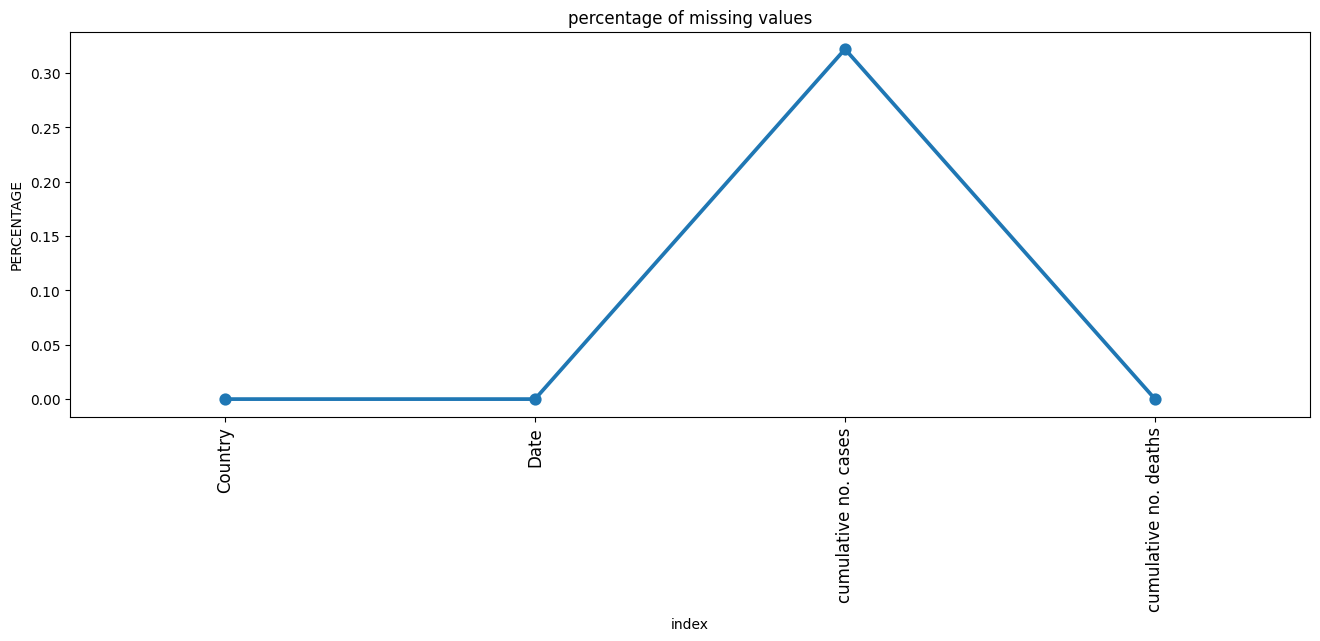

In [14]:
missing = pd.DataFrame((new_df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize = (16, 5))
ax = sns.pointplot(x='index', y=0 ,data=missing)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [15]:
new_df.describe()

cumulative no. cases  cumulative no. deaths
count           2477.000000            2485.000000
mean            2553.678644            1028.347686
std             4427.118148            1656.064372
min                0.000000               0.000000
25%                1.000000               0.000000
50%                8.000000               6.000000
75%             3657.000000            2386.000000
max            14122.000000            4806.000000

In [16]:
new_df.isnull().sum()

Country                  0
Date                     0
cumulative no. cases     8
cumulative no. deaths    0
dtype: int64

In [17]:
# Check for null values
null_rows = new_df[new_df['cumulative no. cases'].isnull()]

In [18]:
null_rows

Country        Date  cumulative no. cases  cumulative no. deaths
301  United Kingdom  2015-01-08                   NaN                    0.0
302            Mali  2015-01-08                   NaN                    6.0
306            Mali  2015-01-09                   NaN                    6.0
308  United Kingdom  2015-01-09                   NaN                    0.0
312  United Kingdom  2015-01-12                   NaN                    0.0
314            Mali  2015-01-12                   NaN                    6.0
316  United Kingdom  2015-01-13                   NaN                    0.0
317            Mali  2015-01-13                   NaN                    6.0

In [19]:
len(new_df)

2485

In [21]:
new_df = new_df.dropna()

In [23]:
new_df.isnull().sum()

Country                  0
Date                     0
cumulative no. cases     0
cumulative no. deaths    0
dtype: int64

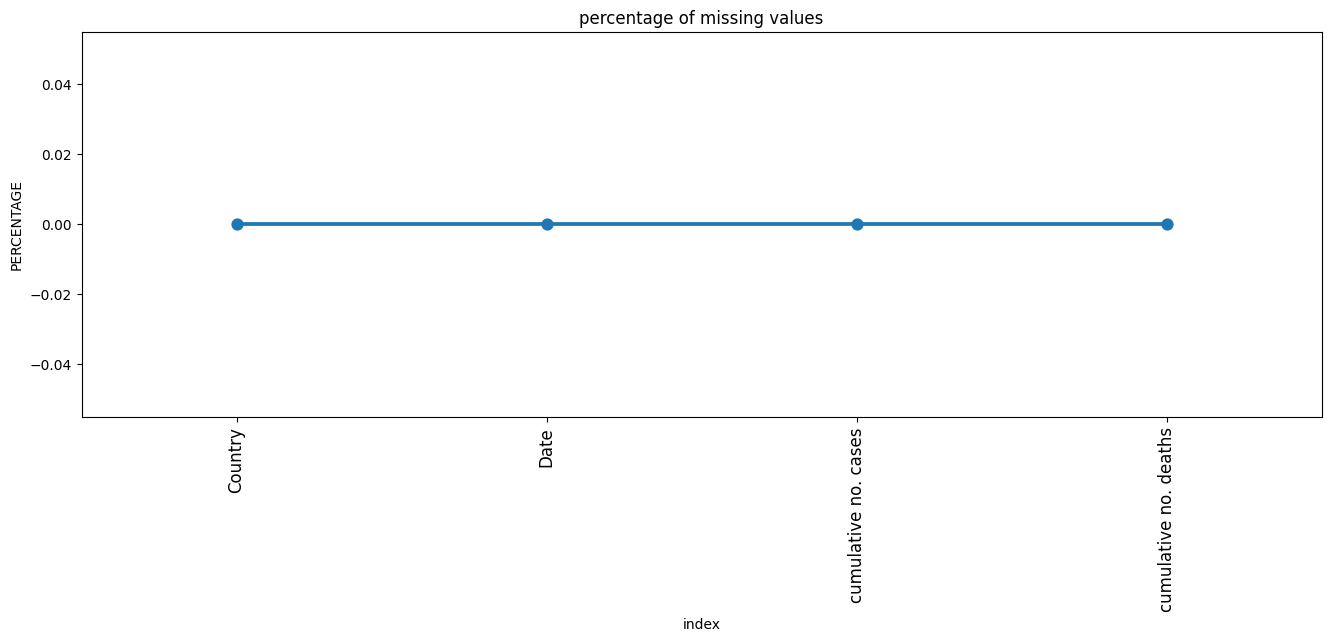

In [24]:
# Again checking for missing values

missing = pd.DataFrame((new_df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize = (16, 5))
ax = sns.pointplot(x='index', y=0 ,data=missing)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2484
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2477 non-null   object 
 1   Date                   2477 non-null   object 
 2   cumulative no. cases   2477 non-null   float64
 3   cumulative no. deaths  2477 non-null   float64
dtypes: float64(2), object(2)
memory usage: 96.8+ KB


In [26]:
len(new_df)

2477

In [27]:
# group by date and country
new_df = new_df.groupby(['Country','Date'])[['cumulative no. cases', 'cumulative no. deaths']].sum().reset_index()

In [28]:
len(new_df)

2371

In [29]:
new_df.tail(3)

Country        Date  cumulative no. cases  \
2368  United States of America  2015-12-23                   4.0   
2369  United States of America  2015-12-29                   4.0   
2370  United States of America  2016-03-23                   4.0   

      cumulative no. deaths  
2368                    1.0  
2369                    1.0  
2370                    1.0

In [30]:
# Check for duplicate rows based on 'Country' and 'Date'
duplicate_rows = new_df[new_df.duplicated(subset=['Country','Date'], keep=False)]

if duplicate_rows.empty:
    print("No duplicate rows found based on 'Country' and 'Date'.")
else:
    print("Duplicate rows based on 'Country' and 'Date':")
    print(duplicate_rows)

No duplicate rows found based on 'Country' and 'Date'.


In [31]:
new_df.head(3)

Country        Date  cumulative no. cases  cumulative no. deaths
0  Guinea  2014-08-29                 648.0                  430.0
1  Guinea  2014-09-05                 812.0                  517.0
2  Guinea  2014-09-08                 862.0                  555.0

In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2371 non-null   object 
 1   Date                   2371 non-null   object 
 2   cumulative no. cases   2371 non-null   float64
 3   cumulative no. deaths  2371 non-null   float64
dtypes: float64(2), object(2)
memory usage: 74.2+ KB


In [33]:
# Convert the float column to integers
new_df['cumulative no. deaths'] = new_df[['cumulative no. deaths']].astype(int)

In [34]:
# Convert the float column to integers
new_df['cumulative no. cases'] = new_df[['cumulative no. cases']].astype(int)

In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                2371 non-null   object
 1   Date                   2371 non-null   object
 2   cumulative no. cases   2371 non-null   int64 
 3   cumulative no. deaths  2371 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 74.2+ KB


In [36]:
# CFR
new_df['CFR(in%)'] = round((new_df['cumulative no. deaths'] / new_df['cumulative no. cases']) * 100, 2)

In [37]:
new_df.tail()

Country        Date  cumulative no. cases  \
2366  United States of America  2015-12-17                     4   
2367  United States of America  2015-12-22                     4   
2368  United States of America  2015-12-23                     4   
2369  United States of America  2015-12-29                     4   
2370  United States of America  2016-03-23                     4   

      cumulative no. deaths  CFR(in%)  
2366                      1      25.0  
2367                      1      25.0  
2368                      1      25.0  
2369                      1      25.0  
2370                      1      25.0

In [38]:
new_df.isnull().sum()

Country                  0
Date                     0
cumulative no. cases     0
cumulative no. deaths    0
CFR(in%)                 2
dtype: int64

In [39]:
new_df[new_df['CFR(in%)'].isna()]

Country        Date  cumulative no. cases  cumulative no. deaths  \
1909  United Kingdom  2015-01-02                     0                      0   
1910  United Kingdom  2015-01-05                     0                      0   

      CFR(in%)  
1909       NaN  
1910       NaN

In [40]:
new_df = new_df.dropna()

In [41]:
 # new_df = new_df.fillna(0)

In [42]:
new_df.isnull().sum()

Country                  0
Date                     0
cumulative no. cases     0
cumulative no. deaths    0
CFR(in%)                 0
dtype: int64

In [43]:
# Calculate daily increments in new cases and new deaths
temp = new_df.groupby(['Country', 'Date'])[['cumulative no. cases', 'cumulative no. deaths']].sum().diff().reset_index()

# Create a mask to identify the first entry for each country
mask = temp['Country'] != temp['Country'].shift(1)

# Set the first entry for each country to NaN
temp.loc[mask, 'cumulative no. cases'] = np.nan
temp.loc[mask, 'cumulative no. deaths'] = np.nan

# Rename columns in temp
temp.columns = ['Country', 'Date', 'New cases', 'New deaths']

# Merge temp with new_df
new_df = pd.merge(new_df, temp, on=['Country', 'Date'])

# Fill NaN values with 0
new_df = new_df.fillna(0)

# Convert data types of 'New cases' and 'New deaths' to int
cols = ['New cases', 'New deaths']
new_df[cols] = new_df[cols].astype('int')

# Ensure 'New cases' is non-negative
new_df['New cases'] = new_df['New cases'].apply(lambda x: 0 if x < 0 else x)

new_df.head()

Country        Date  cumulative no. cases  cumulative no. deaths  CFR(in%)  \
0  Guinea  2014-08-29                   648                    430     66.36   
1  Guinea  2014-09-05                   812                    517     63.67   
2  Guinea  2014-09-08                   862                    555     64.39   
3  Guinea  2014-09-12                   861                    557     64.69   
4  Guinea  2014-09-16                   936                    595     63.57   

   New cases  New deaths  
0          0           0  
1        164          87  
2         50          38  
3          0           2  
4         75          38

In [45]:
new_df.isnull().sum()

Country                  0
Date                     0
cumulative no. cases     0
cumulative no. deaths    0
CFR(in%)                 0
New cases                0
New deaths               0
dtype: int64

In [46]:
new_df.columns

Index(['Country', 'Date', 'cumulative no. cases', 'cumulative no. deaths',
       'CFR(in%)', 'New cases', 'New deaths'],
      dtype='object')

In [47]:
new_df.describe()


cumulative no. cases  cumulative no. deaths     CFR(in%)    New cases  \
count           2369.000000            2369.000000  2369.000000  2369.000000   
mean            2670.097932            1078.691431    29.853225    11.216969   
std             4493.185442            1680.322680    26.777053    64.781404   
min                1.000000               0.000000     0.000000     0.000000   
25%                1.000000               0.000000     0.000000     0.000000   
50%                8.000000               6.000000    29.190000     0.000000   
75%             3750.000000            2440.000000    45.050000     0.000000   
max            14122.000000            4813.000000   100.000000  1870.000000   

        New deaths  
count  2369.000000  
mean      4.121992  
std      26.032316  
min    -440.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max     471.000000


- **cumulative no. cases**: 
  - The mean (average) number of cumulative cases is approximately 2555.74.
  - The data has a relatively large spread, with a standard deviation of approximately 4428.31.
  - The minimum number of cases observed is 1.
  - The 25th percentile indicates that 25% of the data has 1 case or fewer.
  - The median (50th percentile) is 8, meaning that 50% of the data has 8 cases or fewer.
  - The 75th percentile shows that 75% of the data has 3660.5 cases or fewer.
  - The maximum number of cases observed is 14122.

- **cumulative no. deaths**:
  - The mean number of cumulative deaths is approximately 1032.49.
  - The data has a standard deviation of approximately 1658.12, indicating variability.
  - The minimum number of deaths observed is 0.
  - The 25th percentile indicates that 25% of the data has 0 deaths.
  - The median (50th percentile) is 6, showing that 50% of the data has 6 deaths or fewer.
  - The 75th percentile suggests that 75% of the data has 2387 deaths or fewer.
  - The maximum number of deaths observed is 4806.

- **CFR(in%)** (Case Fatality Rate):
  - The mean CFR is approximately 29.96%.
  - The data has a standard deviation of approximately 26.23%, indicating variability.
  - The minimum CFR observed is 0%.
  - The 25th percentile indicates that 25% of the data has a CFR of 0%.
  - The median (50th percentile) is 29.88%, meaning that 50% of the data has a CFR of 29.88% or lower.
  - The 75th percentile shows that 75% of the data has a CFR of 45.06% or lower.
  - The maximum CFR observed is 100%.

- **New cases**:
  - The mean number of new cases is approximately 10.76.
  - The data has a standard deviation of 63.42, suggesting variation.
  - The minimum number of new cases observed is 0.
  - The 25th percentile indicates that 25% of the data has 0 new cases.
  - The median (50th percentile) is 0, meaning that 50% of the data has 0 new cases.
  - The 75th percentile suggests that 75% of the data has 0 new cases.
  - The maximum number of new cases observed is 1870, indicating the presence of an extreme value.

- **New deaths**:
  - The mean number of new deaths is approximately 3.95.
  - The data has a standard deviation of 25.48, showing variation.
  - The minimum number of new deaths observed is -440, which is a negative value.
  - The 25th percentile indicates that 25% of the data has 0 new deaths.
  - The median (50th percentile) is 0, meaning that 50% of the data has 0 new deaths.
  - The 75th percentile suggests that 75% of the data has 0 new deaths.
  - The maximum number of new deaths observed is 471, indicating the presence of an extreme data point.

These statistics provide a detailed summary of each column in dataset, including measures of central tendency, spread, and the presence of potential outliers.


1. **Data Spread**: The large standard deviations for "cumulative no. cases" and "cumulative no. deaths" indicate a wide spread or variation in these values. This suggests that there may be significant differences in the numbers of cases and deaths across the data points.

2. **Case Fatality Rate (CFR)**: The mean CFR is approximately 29.96%, indicating that, on average, around 29.96% of cases resulted in death. However, the wide standard deviation (26.23%) suggests substantial variation in CFR across the data, with some values close to 0% and others reaching 100%.

3. **New Cases and New Deaths**: Both "New cases" and "New deaths" columns have relatively low means, suggesting that, on average, the number of new cases and new deaths is low. However, the large standard deviations and the presence of extreme values indicate that there are fluctuations and potential outliers in these numbers.

4. **Cumulative Numbers**: The minimum values for "cumulative no. cases" and "cumulative no. deaths" are 1 and 0, respectively, indicating that there are data points with very low values. The 25th percentiles are also 1 and 0, showing that at least 25% of the data falls within this range. However, the 75th percentiles are 3660.5 and 2387, suggesting that the majority of data points have higher cumulative numbers.

5. **Presence of Outliers**: The presence of negative values in "New deaths" and very high values in "New cases" and "cumulative no. cases" suggests the presence of outliers or data anomalies that significantly deviate from the typical values in these columns.

In summary, data indicates a wide range of values for cumulative cases and deaths, substantial variation in CFR, fluctuations in new cases and new deaths, and the presence of potential outliers. The data may be diverse, with some regions or time periods having very different characteristics from others. Further analysis and domain-specific knowledge are needed to interpret and understand the reasons behind these variations and anomalies in the data.

AFTER FINDING THE PRESENCE OF OUTLIERS----
1) CHECKING MISSING VALUES
2) CHECKING AND REMOVING DUBLICATE COLUMNS OR COMBINING (LETS SEE)

In [48]:
new_df.head()

Country        Date  cumulative no. cases  cumulative no. deaths  CFR(in%)  \
0  Guinea  2014-08-29                   648                    430     66.36   
1  Guinea  2014-09-05                   812                    517     63.67   
2  Guinea  2014-09-08                   862                    555     64.39   
3  Guinea  2014-09-12                   861                    557     64.69   
4  Guinea  2014-09-16                   936                    595     63.57   

   New cases  New deaths  
0          0           0  
1        164          87  
2         50          38  
3          0           2  
4         75          38

### Exploratory Data Analysis (EDA)

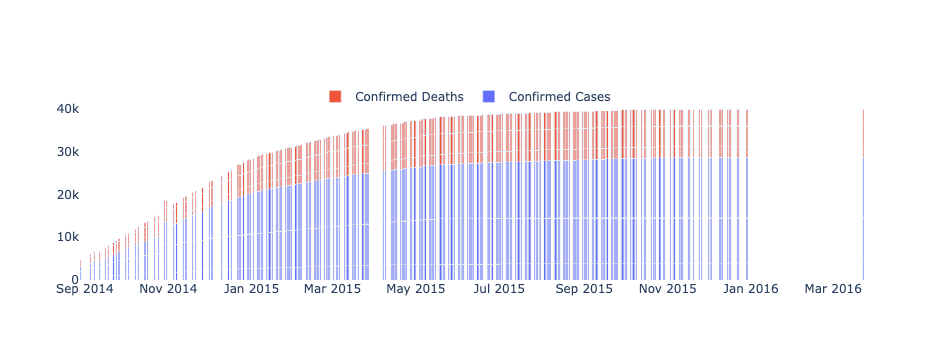

In [49]:

import plotly.graph_objs as go
fig = go.Figure(go.Bar(x=new_df['Date'], y=new_df['cumulative no. cases'], name='Confirmed Cases'))
fig.add_trace(go.Bar(x=new_df['Date'], y=new_df['cumulative no. deaths'], name='Confirmed Deaths'))
#fig.add_trace(go.Bar(x=Trend.Date, y= Trend.Confirmed, name='Confirmed'))

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                 paper_bgcolor='white',
                 plot_bgcolor = "white",)
fig.show()


In [50]:
# load countries map
world_map = gpd.read_file('countries.geojson')
world_map.head()

ADMIN ISO_A3                                           geometry
0        Aruba    ABW  POLYGON ((-69.99694 12.57758, -69.93639 12.531...
1  Afghanistan    AFG  POLYGON ((71.04980 38.40866, 71.05714 38.40903...
2       Angola    AGO  MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...
3     Anguilla    AIA  MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...
4      Albania    ALB  POLYGON ((19.74777 42.57890, 19.74601 42.57993...

In [51]:
#select only important columns
world_map = world_map[['ADMIN', 'geometry']]
world_map.head()

ADMIN                                           geometry
0        Aruba  POLYGON ((-69.99694 12.57758, -69.93639 12.531...
1  Afghanistan  POLYGON ((71.04980 38.40866, 71.05714 38.40903...
2       Angola  MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...
3     Anguilla  MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...
4      Albania  POLYGON ((19.74777 42.57890, 19.74601 42.57993...

<bound method _AxesBase.set_axis_off of <Axes: title={'left': 'EVD first appeared in 1976 in 2 simultaneous outbreaks, \n  1. Nzara, South Sudan, \n  2. Yambuku, DRC'}>>

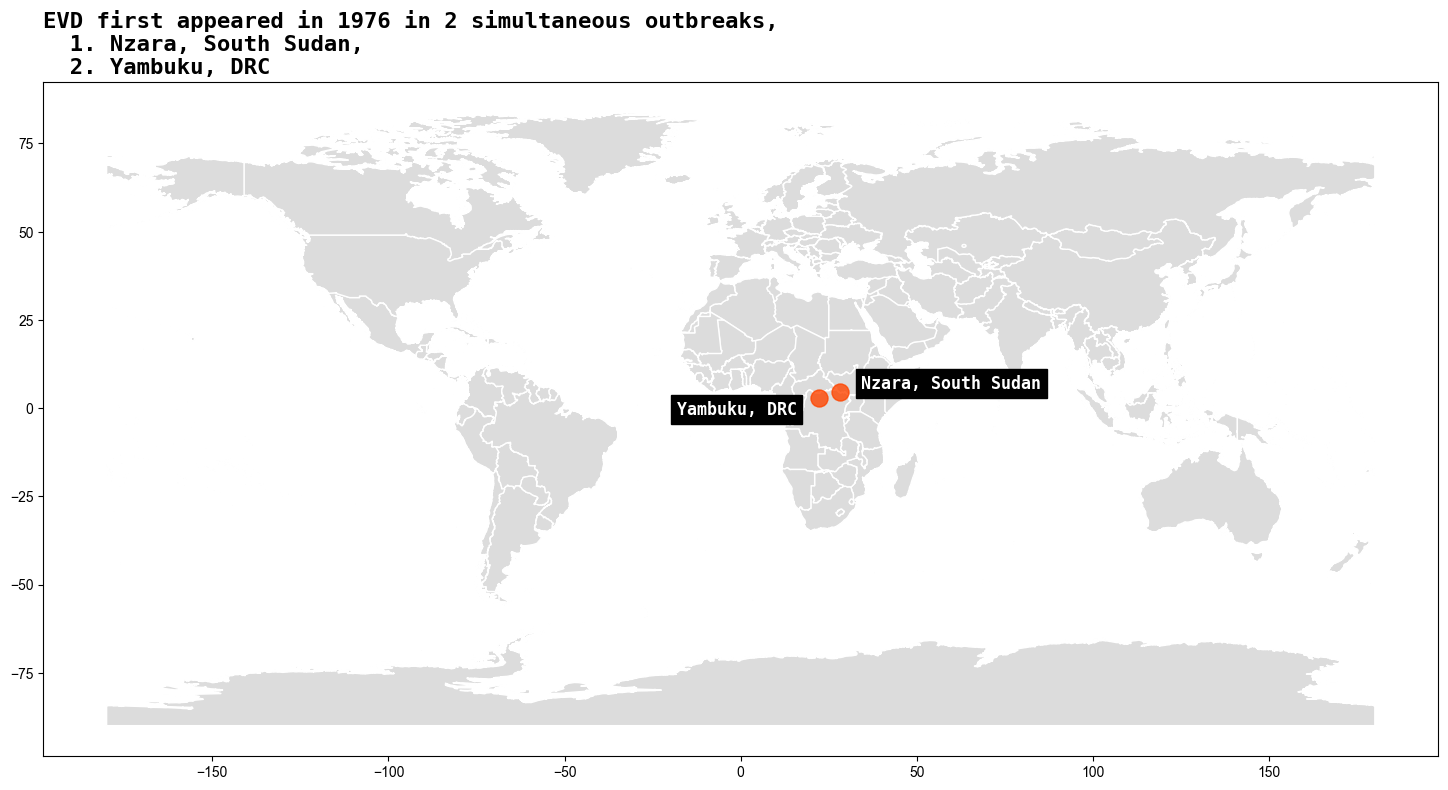

In [52]:
fig, ax = plt.subplots(figsize=(18, 14))
sns.set_style('whitegrid')

world_map.plot(ax=ax, color='gainsboro')
ax.set_title('EVD first appeared in 1976 in 2 simultaneous outbreaks, \n  1. Nzara, South Sudan, \n  2. Yambuku, DRC', 
             loc='left', fontdict={'fontsize': 16, 
                                   'fontfamily': 'monospace', 
                                   'fontweight': 'bold',
                                   'color': 'black'})

ax.scatter(28.2644, 4.6340, color='orangered', s=150, alpha=0.8)
ax.text(34.2644, 5.6340, 'Nzara, South Sudan', 
        fontfamily='monospace', fontsize=12, fontweight='bold',
        color='white', backgroundcolor='black')

ax.scatter(22.2250, 2.8250, color='orangered', s=150, alpha=0.8)
ax.text(-18.2250, -1.8250, 'Yambuku, DRC', 
        fontfamily='monospace', fontsize=12, fontweight='bold',
        color='white', backgroundcolor='black')

ax.set_axis_off




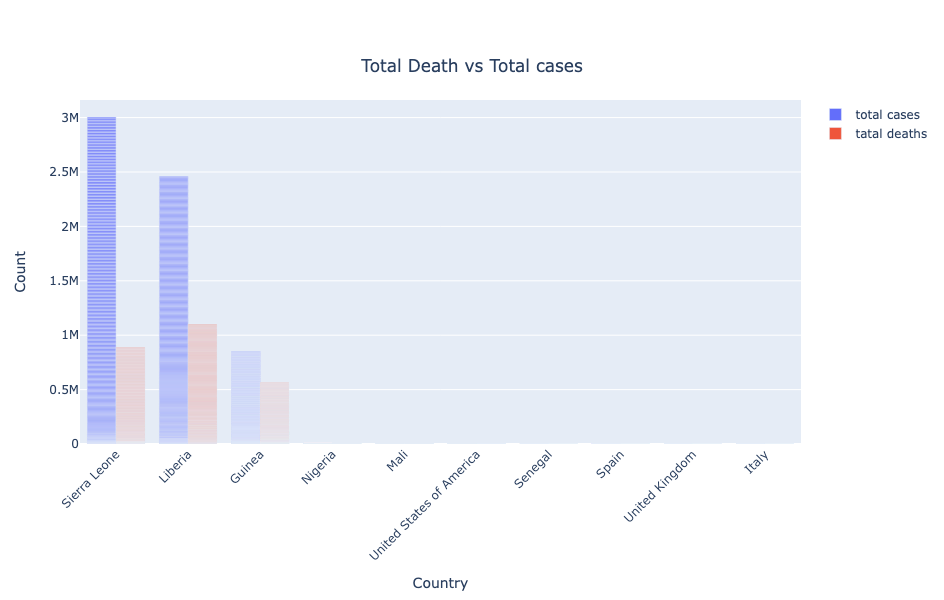

In [53]:
countries = new_df['Country']
cases =new_df['cumulative no. cases']
deaths = new_df['cumulative no. deaths']


fig = go.Figure(data=[
    go.Bar(name='total cases', x=countries, y=cases),
    go.Bar(name='tatal deaths', x=countries, y=deaths),
])
# Change the bar mode

fig.update_layout(

    width = 1000,
    height = 600,
    
    title={
        'text': "Total Death vs Total cases ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},


    xaxis_title="Country",
    yaxis_title="Count",
    xaxis={'categoryorder': 'total descending','tickangle': -45},
     
)
fig.show()

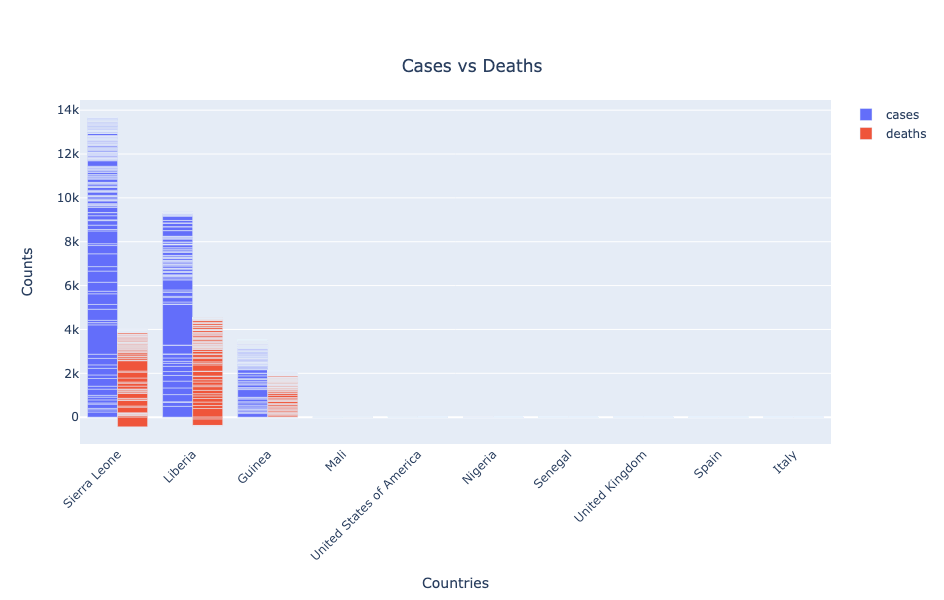

In [54]:
countries = new_df['Country']
cases =new_df['New cases']
deaths = new_df['New deaths']


fig = go.Figure(data=[
    go.Bar(name='cases', x=countries, y=cases),
    go.Bar(name='deaths', x=countries, y=deaths),
])
# Change the bar mode

fig.update_layout(

    width = 1000,
    height = 600,
    
    title={
        'text': " Cases vs Deaths ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},


    xaxis_title="Countries",
    yaxis_title="Counts",
    xaxis={'categoryorder': 'total descending','tickangle': -45},
     
)
fig.show()

In [55]:
# Check for negative death counts in 'cumulative no. deaths' column
negative_deaths = new_df[new_df['cumulative no. deaths'] < 0]

if not negative_deaths.empty:
    print("Negative death counts found:")
    print(negative_deaths)
else:
    print("No negative death counts found.")


No negative death counts found.


In [56]:
# Check for negative death counts in 'New deaths' column
negative_deaths = new_df[new_df['New deaths'] < 0]

if not negative_deaths.empty:
    print("Negative death counts found:")
    print(negative_deaths)
else:
    print("No negative death counts found.")


Negative death counts found:
           Country        Date  cumulative no. cases  cumulative no. deaths  \
117         Guinea  2015-05-13                  3599                   2391   
403        Liberia  2014-09-12                  2081                   1137   
417        Liberia  2014-10-29                  6535                   2413   
422        Liberia  2014-11-14                  6878                   2812   
424        Liberia  2014-11-21                  7082                   2963   
555        Liberia  2015-07-06                 10670                   4807   
665           Mali  2014-11-14                     4                      3   
1426  Sierra Leone  2014-11-05                  4759                   1070   

      CFR(in%)  New cases  New deaths  
117      66.44          2          -1  
403      54.64         35         -87  
417      36.92       1870        -292  
422      40.88         56         -24  
424      41.84         13          -1  
555      45.05     

In [57]:
# Set a threshold for minimum allowable change
threshold = 0

# Replace negative daily increments with zero using NumPy
new_df['New deaths'] = np.where(new_df['New deaths'] < threshold, 0, new_df['New deaths'])

In [58]:
# Again Check for negative death counts in 'New deaths' column
negative_deaths = new_df[new_df['New deaths'] < 0]

if not negative_deaths.empty:
    print("Negative death counts found:")
    print(negative_deaths)
else:
    print("No negative death counts found.")

No negative death counts found.


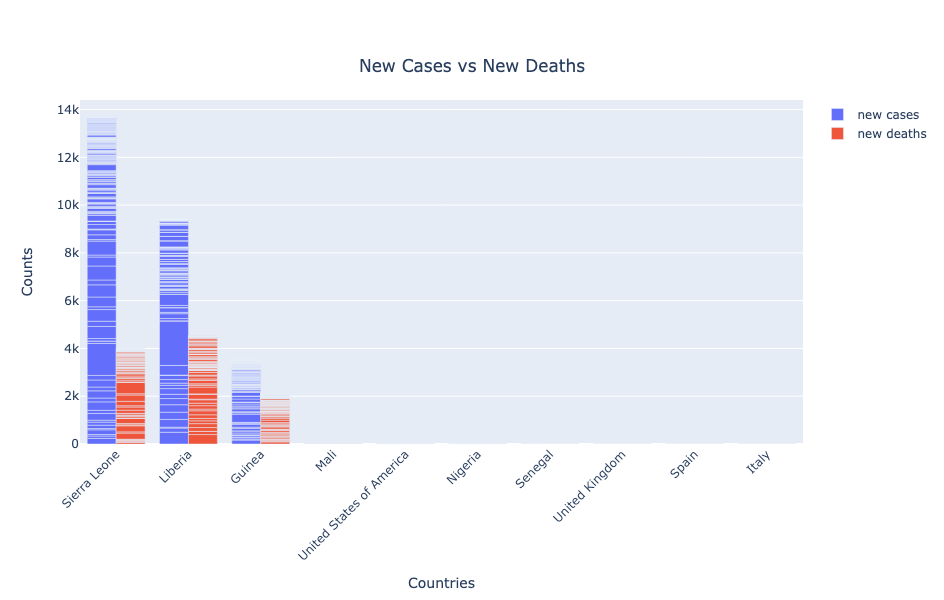

In [59]:
countries = new_df['Country']
cases =new_df['New cases']
deaths = new_df['New deaths']


fig = go.Figure(data=[
    go.Bar(name='new cases', x=countries, y=cases),
    go.Bar(name='new deaths', x=countries, y=deaths),
])
# Change the bar mode

fig.update_layout(

    width = 1000,
    height = 600,
    
    title={
        'text': " New Cases vs New Deaths ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},


    xaxis_title="Countries",
    yaxis_title="Counts",
    xaxis={'categoryorder': 'total descending','tickangle': -45},
     
)
fig.show()

In [60]:
latest = new_df[new_df['Date']==max(new_df['Date'])]
latest = latest.sort_values('cumulative no. cases', ascending=False)
latest = latest.reset_index()

In [61]:
def plot_barh(col):
    '''Plot horizontal bar chart on cumulative count on given column'''
    temp_new_df = latest.sort_values(col, ascending=False)
    
    fig =  px.bar(temp_new_df, x=col, y='Country', orientation='h', 
                  color='Country', text=col, title=col, width=900, height=600, 
                  hover_data = ['cumulative no. cases', 
                                'cumulative no. deaths', 
                                'CFR(in%)'],
                  
                  color_discrete_sequence = px.colors.qualitative.Dark2)
    
    fig.update_traces(textposition='auto')
    fig.update_layout(xaxis_title="", yaxis_title="", showlegend=False,
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

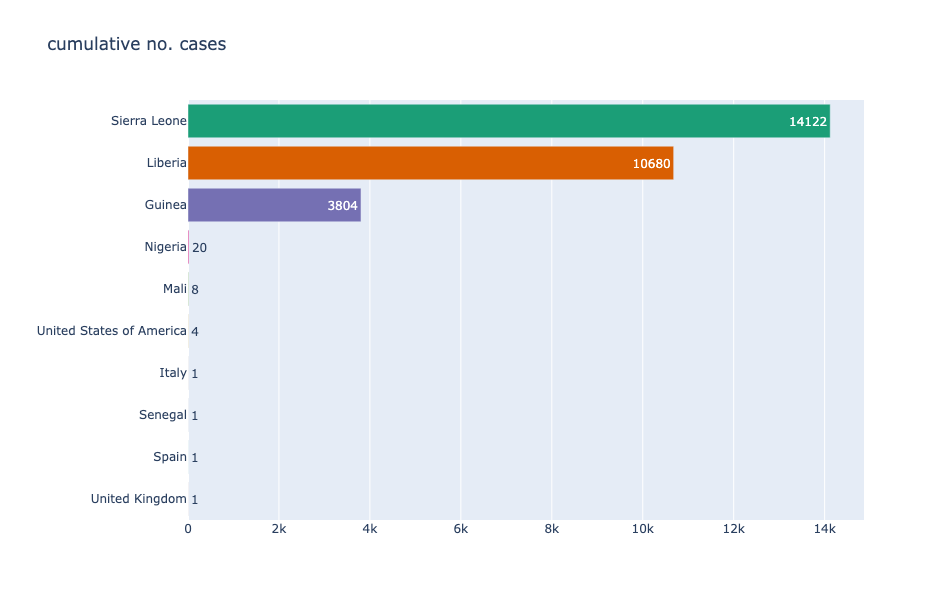

In [62]:
plot_barh('cumulative no. cases')

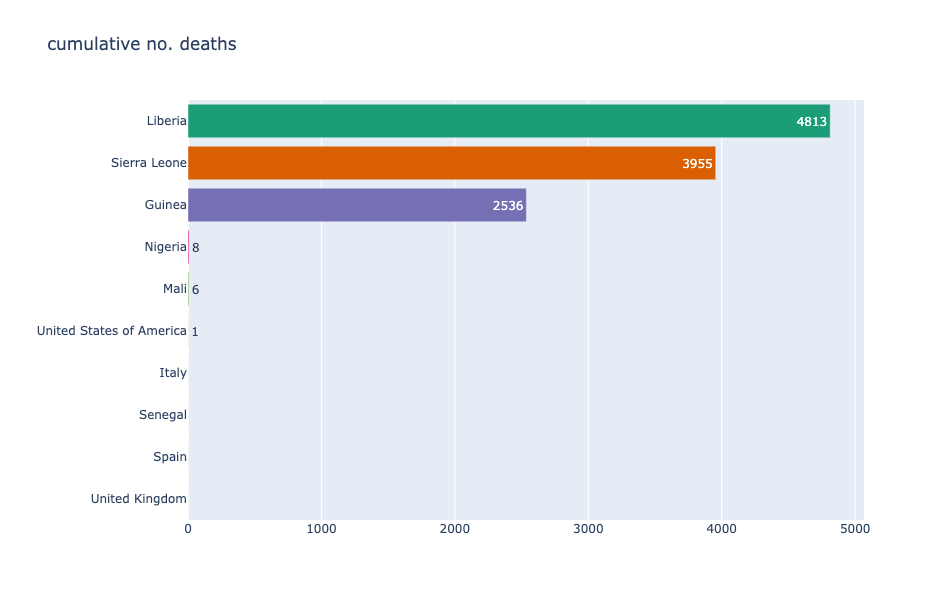

In [63]:
plot_barh('cumulative no. deaths')

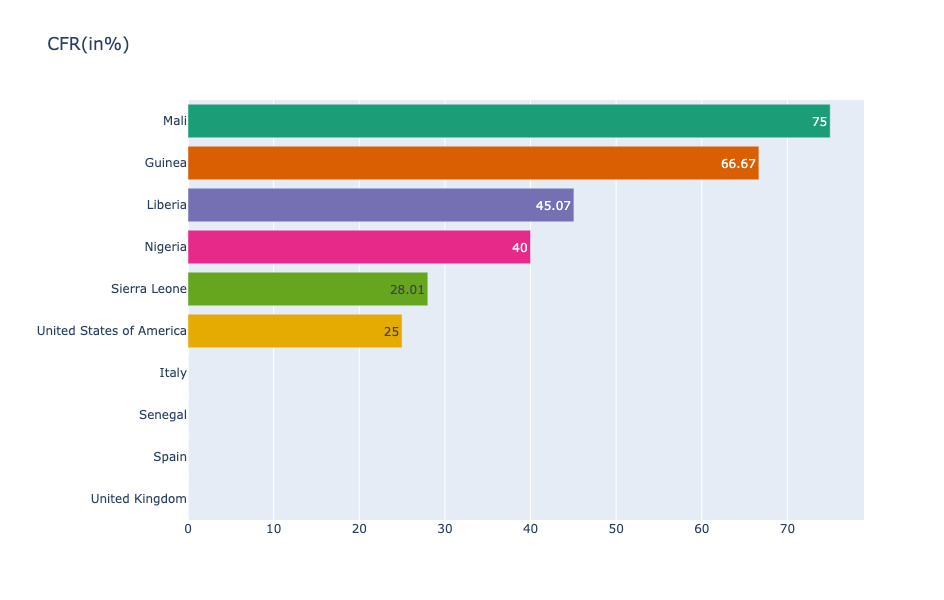

In [64]:
plot_barh('CFR(in%)')

In [65]:
# Check the datatype of a specific column
datatype_cfr = new_df['CFR(in%)'].dtypes

In [66]:
print(datatype_cfr)

float64


In [67]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2369 non-null   object 
 1   Date                   2369 non-null   object 
 2   cumulative no. cases   2369 non-null   int64  
 3   cumulative no. deaths  2369 non-null   int64  
 4   CFR(in%)               2369 non-null   float64
 5   New cases              2369 non-null   int64  
 6   New deaths             2369 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 129.7+ KB


In [68]:
import pandas as pd
import plotly.express as px

# Convert the 'Date' column to datetime
new_df['Date'] = pd.to_datetime(new_df['Date'])

def plot_stacked(col):
    temp = new_df.groupby([new_df['Date'].dt.strftime('%Y-%m-01'), 'Country']) \
            [['cumulative no. cases', 'cumulative no. deaths', 'New cases', 'New deaths']].max()
    temp = temp.reset_index()
    
    fig = px.area(temp, x="Date", y=col, color='Country', orientation='v', width=700, height=500,
             title='Cases', color_discrete_sequence = px.colors.qualitative.Prism)
    fig.show()


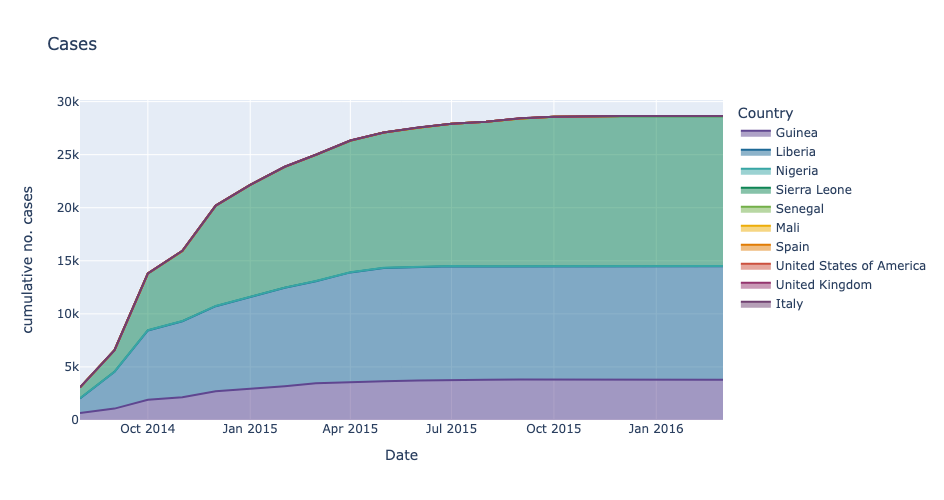

In [69]:
plot_stacked('cumulative no. cases')

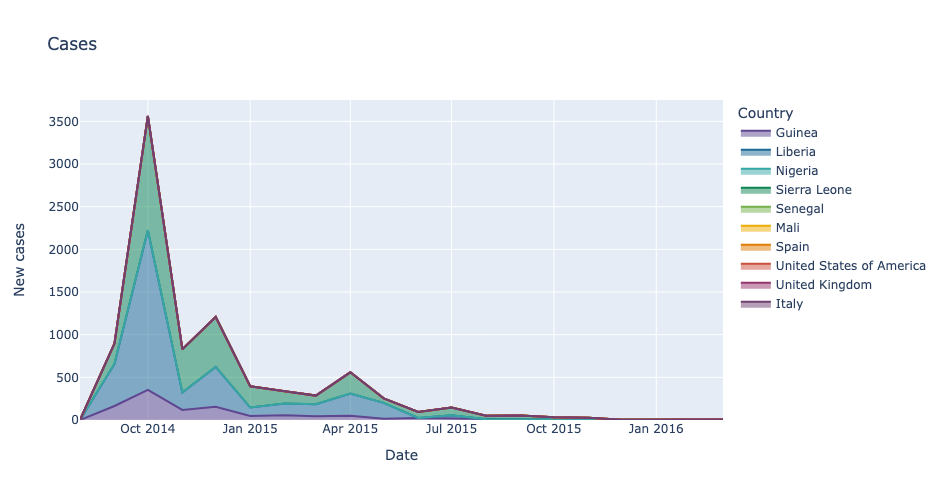

In [70]:
plot_stacked('New cases')

In [71]:
high_new_df = latest.iloc[:3]
high_melt = high_new_df.melt(id_vars = 'Country', 
                         value_vars=['cumulative no. cases', 'cumulative no. deaths'], 
                         var_name='Case', value_name='Count')

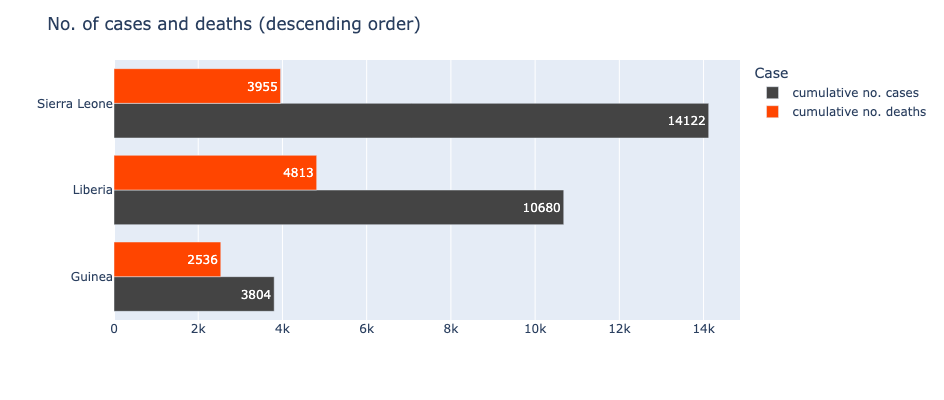

In [72]:
fig = px.bar(high_melt, x='Count', y='Country', color='Case', text='Count',
             orientation='h', width=700, height=400, barmode='group', 
             color_discrete_sequence=['#444444', 'orangered'])
fig.update_layout(title='No. of cases and deaths (descending order)', xaxis_title="", yaxis_title="")
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [73]:
low_new_df = latest.iloc[3:]
low_melt = low_new_df.melt(id_vars = 'Country', 
                       value_vars=['cumulative no. cases', 'cumulative no. deaths'], 
                       var_name='Case', value_name='Count')


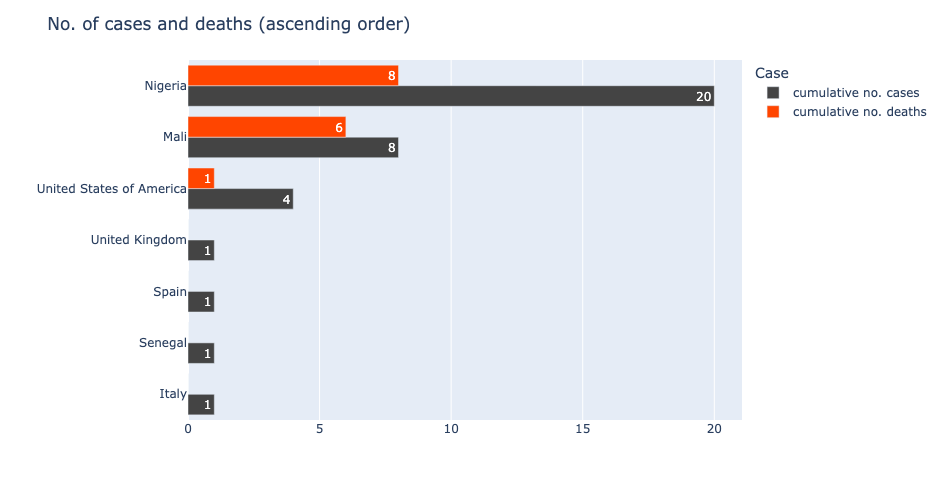

In [74]:

fig = px.bar(low_melt, x='Count', y='Country', color='Case', text='Count',
             orientation='h', width=700, height=500, barmode='group', 
             color_discrete_sequence=['#444444', 'orangered'])
fig.update_layout(title='No. of cases and deaths (ascending order)', xaxis_title="", yaxis_title="")
fig.update_layout(barmode='group', yaxis={'categoryorder':'total ascending'})
fig.show()

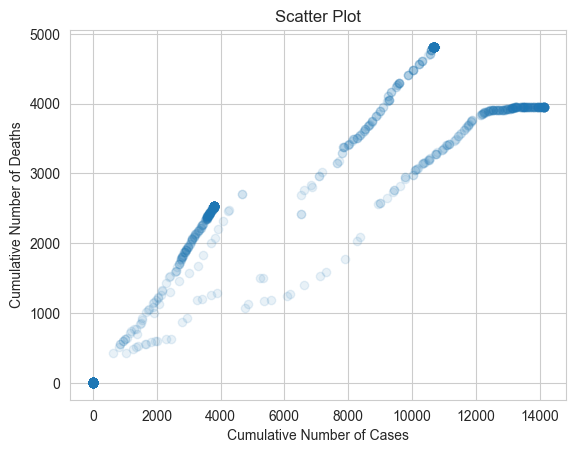

In [75]:

plt.scatter(new_df['cumulative no. cases'],new_df['cumulative no. deaths'], alpha=0.1)

plt.xlabel('Cumulative Number of Cases')
plt.ylabel('Cumulative Number of Deaths')
plt.title('Scatter Plot')
plt.show()


<Axes: xlabel='cumulative no. cases', ylabel='cumulative no. deaths'>

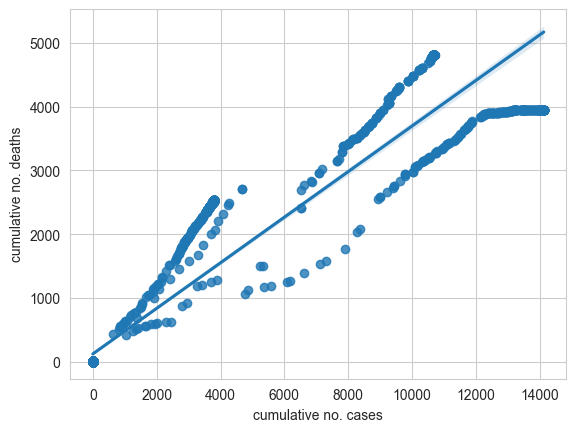

In [76]:
sns.regplot(x='cumulative no. cases', y='cumulative no. deaths',
          data=new_df)

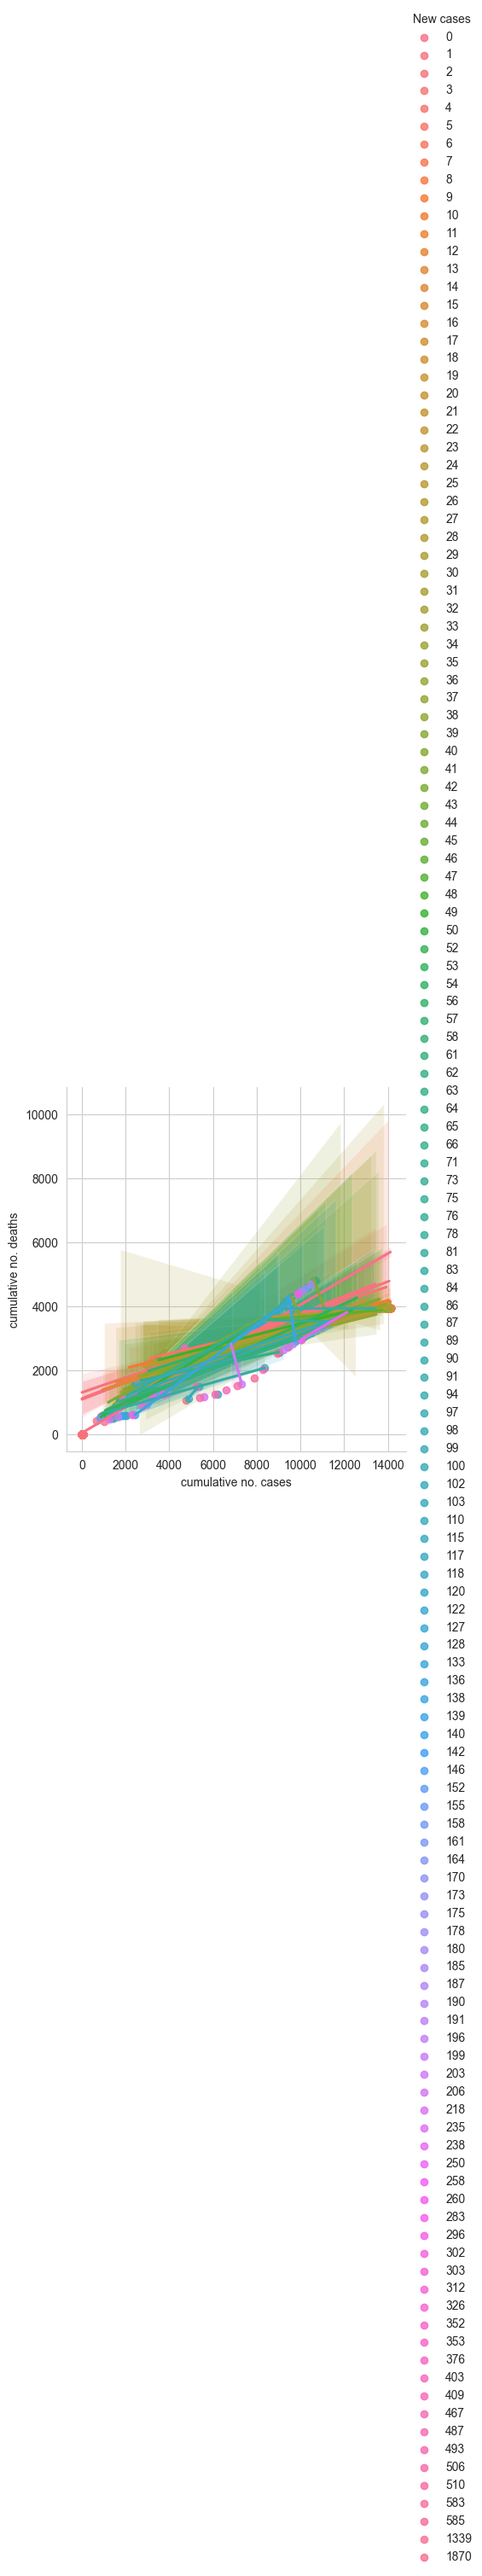

In [77]:
sns.lmplot(x='cumulative no. cases', y='cumulative no. deaths',
                hue = 'New cases', data=new_df)

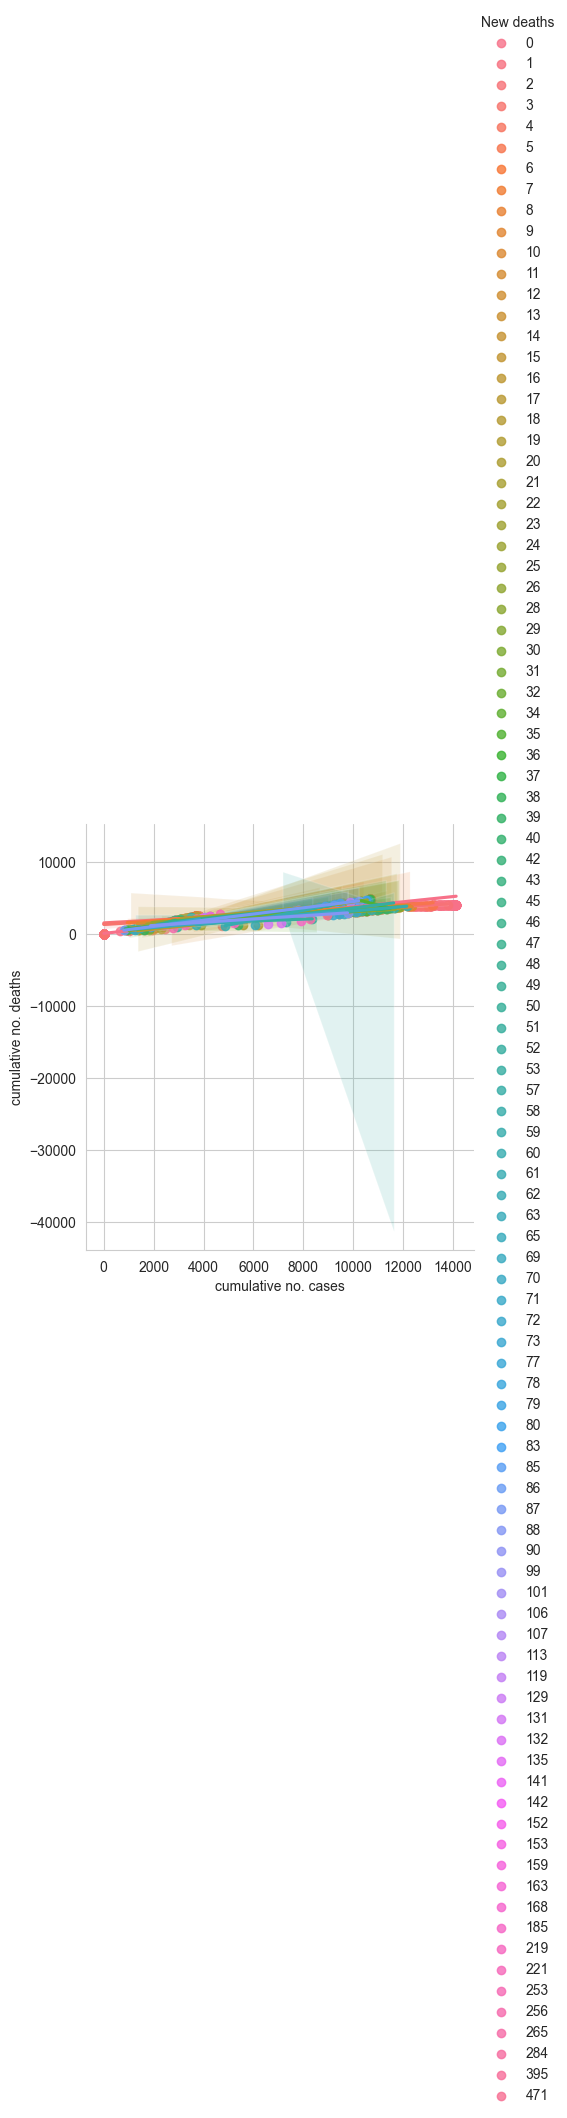

In [78]:
sns.lmplot(x='cumulative no. cases', y='cumulative no. deaths',
                hue = 'New deaths', data=new_df)

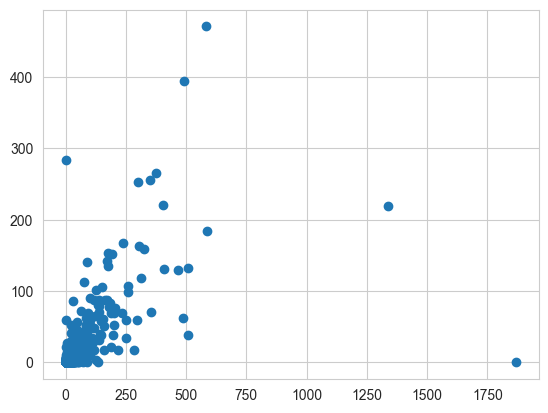

In [79]:
plt.scatter(new_df['New cases'],new_df['New deaths'])


## FINDING CORRELATION
Using pearson's correlation

value lies b/w -1 to 1

the more the value is +ve the more positive correlation

In [80]:
numeric_columns = new_df.select_dtypes(include=['int', 'float'])
corr_matrix = numeric_columns.corr()
correlation_with_new_deaths = corr_matrix['New deaths'].sort_values(ascending=False)

In [81]:
corr_matrix

cumulative no. cases  cumulative no. deaths  CFR(in%)  \
cumulative no. cases               1.000000               0.955130  0.234138   
cumulative no. deaths              0.955130               1.000000  0.344783   
CFR(in%)                           0.234138               0.344783  1.000000   
New cases                          0.146423               0.124522  0.059778   
New deaths                         0.136076               0.138196  0.102303   

                       New cases  New deaths  
cumulative no. cases    0.146423    0.136076  
cumulative no. deaths   0.124522    0.138196  
CFR(in%)                0.059778    0.102303  
New cases               1.000000    0.628080  
New deaths              0.628080    1.000000

In [82]:
correlation_with_new_deaths

New deaths               1.000000
New cases                0.628080
cumulative no. deaths    0.138196
cumulative no. cases     0.136076
CFR(in%)                 0.102303
Name: New deaths, dtype: float64